<a href="https://colab.research.google.com/github/Yamito548/Proyectos-peque-os/blob/main/Calidad_de_manzanas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este es un dataset encontrado en [kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality), en donde podremos ver características de manzanas, con ello pudiendo saber su calidad. Las cuales son 9, 7 sin contar la calidad ni su id. Sus características son las que te puedes imaginar para una manzana como su tamaño, peso, dulzura, crujiente, jugocidad, grado de maduración y acidez

Cargamos el dataset

In [7]:
import pandas as pd
data = pd.read_csv("apple_quality.csv")
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


No creo que sea necesario normalizar estos datos ya que todas las columnas númericas tienen un rango parejo. Lo que si que veo es que hay valores faltante, pero solo en la última fila

In [8]:
data_faltante = data.isnull().sum()
data_faltante

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

Como podemos ver, solo la última fila es la que esta mal. La borraré.

In [9]:
#Borramos la fila 4000 la cual da problemas.
data = data.drop(4000)
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


# Matriz de correlación

<ipython-input-10-baa7345ca873>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matriz = data.corr()


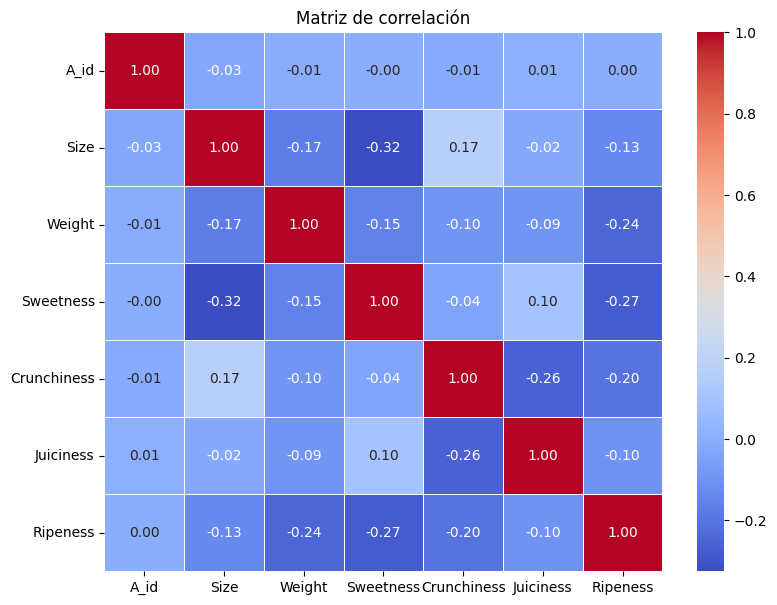

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#Calculamos la matriz de correlación.
corr_matriz = data.corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr_matriz, annot=True,cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

# Kbest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop("Quality",axis=1)
y = data["Quality"]

modelo = GaussianNB()

#Comprobamos que cantidad de característica da el mejor resultado.
for n in range(2,8):
  k_best = SelectKBest(score_func=f_classif, k=n)
  X_select = k_best.fit_transform(X,y)
  select_columns = X.columns[k_best.get_support()]
  X_best = pd.DataFrame(X_select ,columns=select_columns)
  X_train,X_test,y_train,y_test = train_test_split(X_best,y, test_size=0.20, random_state=100)
  modelo.fit(X_train,y_train)
  y_pred= modelo.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  print(f"Número de características: {n}")
  print(f"Las características seleccionadas son: {select_columns}")
  print(f"La precisión es de {accuracy}")

# Creamos nuevo dataset

In [26]:
#Dataset con 5 característica.
k_best = SelectKBest(score_func=f_classif, k=5)
X_select = k_best.fit_transform(X,y)
select_columns = X.columns[k_best.get_support()]
X_best = pd.DataFrame(X_select,columns=select_columns)

X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.20, random_state=100)

modelo = GaussianNB()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"La precisión del modelo es de {round((accuracy),2)}")

La precisión del modelo es de 0.7


#Usamos cross validation

In [71]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=3, shuffle=True,random_state=100)
total_scores = []

for train_fold, test_fold in cv.split(X_train):
      #División de los datos.
      kf_train_x = X_train.iloc[train_fold]
      kf_train_y = y_train.iloc[train_fold]
      kf_test_x = X_train.iloc[test_fold]
      kf_test_y = y_train.iloc[test_fold]
      #Entremanos el modelo con los datos divididos.
      modelo.fit(kf_train_x,kf_train_y)
      y_pred = modelo.predict(kf_test_x)
      #Miramos la exactitud
      accuracy = accuracy_score(kf_test_y,y_pred)
      total_scores.append(accuracy)

for pliegue,score in enumerate(total_scores, start=1):
  print(f"Para el pliegue {pliegue} tenemos una precisión del {score}")

Para el pliegue 1 tenemos una precisión del 0.753514526710403
Para el pliegue 2 tenemos una precisión del 0.7525773195876289
Para el pliegue 3 tenemos una precisión del 0.7448405253283302


Al usar cross val score mejora un poco la precisión, pero como el prefiero seguir usando solo el gaussianNB, debido a que este es más exacto ya que no trabaja con datos tan dividos.

# Prueba con datos diferentes

In [33]:
#Introducimos los datos.
import numpy as np
X_in = np.array([-4.000000,5.34633,-1.000000,1.9449,0.32984]).reshape(1,-1)
prediccion = modelo.predict(X_in)
prediccion[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


'good'

In [30]:
X_best

,Size,Sweetness,Crunchiness,Juiciness,Ripeness
0,-3.970049,5.34633,-1.012009,1.8449,0.32984
1,-1.195217,3.664059,1.588232,0.853286,0.86753
2,-0.292024,-1.738429,-0.342616,2.838636,-0.038033
3,-0.657196,1.324874,-0.097875,3.63797,-3.413761
4,1.364217,-0.384658,-0.553006,3.030874,-1.303849
...,...,...,...,...,...
3995,0.059386,-3.714549,0.473052,1.697986,2.244055
3996,-0.293118,-0.20402,-0.640196,0.024523,-1.0879
3997,-2.634515,-2.440461,0.657223,2.199709,4.763859
3998,-4.008004,2.366397,-0.200329,2.161435,0.214488


En este caso, por lo que veo cogiendo 5 características nos da casi un 70%.Es por ello y debido a que al usar 6 características no mejora nada, solo usaré 5.